In [253]:
import os
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'

In [254]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch

In [255]:
data = './data/digit-recognizer/train.csv'

In [256]:
df = pd.read_csv(data)

In [257]:
display(df.head(1))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Separate images from labels

In [258]:
X = df.drop(columns=['label'])
y = df['label']

In [294]:
print('labels:', y.unique())
print('labels:', y.unique().size)

labels: [1 0 4 7 3 5 8 9 2 6]
labels: 10


### See an example image

digit: 2


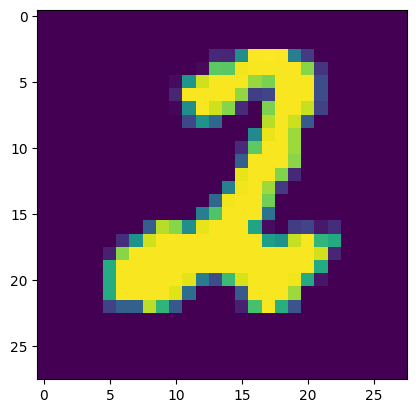

In [260]:
sample = X.sample()
image = sample.values.reshape((28,28))
idx = sample.index
print('digit:',y.iloc[idx].values.squeeze())
plt.imshow(image)
plt.show()

### Work with GPU

In [270]:
device = torch.device('cuda:0')
display(torch.cuda.get_device_name(device))

'AMD Radeon RX 6950 XT'

### Reshape images

In [274]:
images = X.values
images = images.reshape(-1, 1, 28, 28)

images = torch.Tensor(images).to(device)
labels = torch.Tensor(labels).to(device)

print(f"images: {images.shape}")
print(f"labels: {labels.shape}")

images: torch.Size([42000, 1, 28, 28])
labels: torch.Size([42000, 1])


### Convolutional Neural Network
Before using some out-of-the-box classifier, lets try defining our own neural network using pytorch

#### Model architecture
- Convolutional layer
- Max pooling
- linear layers

In [389]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 1, (5,5))
        self.conv2 = nn.Conv2d(1, 1, (5,5))
        self.pool = nn.MaxPool2d((2,2))
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
            
                    
classifier = NeuralNet().to(device)
display(images.shape)
classifier.forward(images).shape

torch.Size([42000, 1, 28, 28])

torch.Size([42000, 10])